In [1]:
import pandas as pd
import numpy as np
import json
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from pprint import pprint

pd.set_option("display.max_rows",6)

%matplotlib inline

In [2]:
# analysis of entire data set
df_train_data = pd.read_csv('varsom_numdata.csv', index_col=0)

FileNotFoundError: File b'varsom_numdata.csv' does not exist

In [10]:
# used to train and test
"""
df_train_data = pd.read_csv('varsom_train_data.csv', index_col=0)
df_test_data = pd.read_csv('varsom_test_data.csv', index_col=0)

df_train_target = pd.read_csv('varsom_train_target.csv', index_col=0)
df_test_target = pd.read_csv('varsom_test_target.csv', index_col=0)
"""

"\ndf_train_data = pd.read_csv('varsom_train_data.csv', index_col=0)\ndf_test_data = pd.read_csv('varsom_test_data.csv', index_col=0)\n\ndf_train_target = pd.read_csv('varsom_train_target.csv', index_col=0)\ndf_test_target = pd.read_csv('varsom_test_target.csv', index_col=0)\n"

In [ ]:
df_train_data.head(5)

In [12]:
df_train_data.columns.values

array(['AvalancheProblems_0_AvalProbabilityId',
       'AvalancheProblems_0_Class_AvalDistributionId',
       'AvalancheProblems_0_AvalTriggerSimpleId',
       'AvalancheProblems_0_AvalancheProblemId',
       'AvalancheProblems_0_Class_AvalancheProblemTypeId',
       'AvalancheProblems_0_AvalancheTypeId',
       'AvalancheProblems_0_DestructiveSizeExtId',
       'AvalancheProblems_1_AvalProbabilityId',
       'AvalancheProblems_1_Class_AvalDistributionId',
       'AvalancheProblems_1_AvalTriggerSimpleId',
       'AvalancheProblems_1_AvalancheProblemId',
       'AvalancheProblems_1_Class_AvalancheProblemTypeId',
       'AvalancheProblems_1_AvalancheTypeId',
       'AvalancheProblems_1_DestructiveSizeExtId', 'DangerLevel',
       'ValidFrom', 'Rainfall_Most_exposed_area', 'Rainfall_Average',
       'Wind_Speed_Num', 'Wind_Direction_Num', 'Temperature_Min',
       'Temperature_Max', 'Temperature_masl', 'Freezing_Level_masl'],
      dtype=object)

In [13]:
# Check if there are no weired values.
for col in df_train_data.drop(['ValidFrom'], axis=1).columns.values:
    print(col, ': ', df_train_data[col].unique())

AvalancheProblems_0_AvalProbabilityId :  [3 2 5]
AvalancheProblems_0_Class_AvalDistributionId :  [2 3 1]
AvalancheProblems_0_AvalTriggerSimpleId :  [10 21 22]
AvalancheProblems_0_AvalancheProblemId :  [1 2 3]
AvalancheProblems_0_Class_AvalancheProblemTypeId :  [6 5 7 4 2]
AvalancheProblems_0_AvalancheTypeId :  [10 20]
AvalancheProblems_0_DestructiveSizeExtId :  [2 1 3]
AvalancheProblems_1_AvalProbabilityId :  [0. 3. 2. 5.]
AvalancheProblems_1_Class_AvalDistributionId :  [0 2 1 3]
AvalancheProblems_1_AvalTriggerSimpleId :  [ 0. 10. 21. 22.]
AvalancheProblems_1_AvalancheProblemId :  [0. 2. 1. 3.]
AvalancheProblems_1_Class_AvalancheProblemTypeId :  [0 7 4 6 5 2]
AvalancheProblems_1_AvalancheTypeId :  [ 0. 10. 20.]
AvalancheProblems_1_DestructiveSizeExtId :  [0. 2. 1. 3.]
DangerLevel :  [2 3 1]
Rainfall_Most_exposed_area :  [ 0  6 15  7 16 25 20 30  2  4  3 45 10  5 12 14  1  8 18 50  9 35 40 13]
Rainfall_Average :  [ 0  2  1  5  8 10 12 30 20  4 15 18  3  6 25 14  9 16]
Wind_Speed_Num :  

In [14]:
### Remove the "2|" in column Rainfall_Average
#df_train_data = df_train_data[df_train_data['Rainfall_Average'] != '2|']        
#print(df_train_data['Rainfall_Average'].unique())

C:\Anaconda3\lib\site-packages\pandas\core\ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

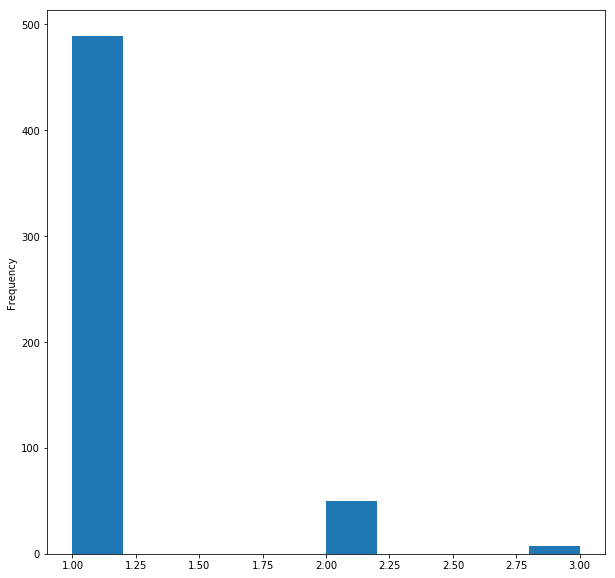

In [15]:
#df_train_data.plot(x='ValidFrom', y='AvalancheProblems_0_AvalancheProblemId', figsize=(16,10), kind='bar')
df_train_data['AvalancheProblems_0_AvalancheProblemId'].plot(figsize=(10,10), kind='hist')
#df_train_data.plot(subplots=True, figsize=(16,20))

In [16]:
df_train_target = df_train_data.filter(['DangerLevel'], axis=1)
df_train_data = df_train_data.drop(['DangerLevel'], axis=1)

data = np.array(df_train_data.drop(['ValidFrom'], axis=1).values, dtype=float)
target = np.array(df_train_target.values, dtype=float)
print(df_train_data.drop(['ValidFrom'], axis=1).columns.values,
     df_train_target.columns.values)


['AvalancheProblems_0_AvalProbabilityId'
 'AvalancheProblems_0_Class_AvalDistributionId'
 'AvalancheProblems_0_AvalTriggerSimpleId'
 'AvalancheProblems_0_AvalancheProblemId'
 'AvalancheProblems_0_Class_AvalancheProblemTypeId'
 'AvalancheProblems_0_AvalancheTypeId'
 'AvalancheProblems_0_DestructiveSizeExtId'
 'AvalancheProblems_1_AvalProbabilityId'
 'AvalancheProblems_1_Class_AvalDistributionId'
 'AvalancheProblems_1_AvalTriggerSimpleId'
 'AvalancheProblems_1_AvalancheProblemId'
 'AvalancheProblems_1_Class_AvalancheProblemTypeId'
 'AvalancheProblems_1_AvalancheTypeId'
 'AvalancheProblems_1_DestructiveSizeExtId' 'Rainfall_Most_exposed_area'
 'Rainfall_Average' 'Wind_Speed_Num' 'Wind_Direction_Num'
 'Temperature_Min' 'Temperature_Max' 'Temperature_masl'
 'Freezing_Level_masl'] ['DangerLevel']


In [19]:
clf = tree.DecisionTreeClassifier(min_samples_leaf=8)
clf = clf.fit(data, target)

In [20]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names = df_train_data.drop(['ValidFrom'], axis=1).columns.values,
                                class_names = ['low', 'moderate', 'considerable', 'high'],
                                #proportion = True, # show precentages instead of members
                                label = "root",
                                filled=True, rounded=True, special_characters=True                                
                                )
graph = graphviz.Source(dot_data) 
graph.render("varsom") 

'varsom.pdf'

## Learning avalanche problems by meteorological factors

In [45]:
df_train_data2 = pd.read_csv('varsel_nordvestlandet_17_18.csv', index_col=0)

pprint(df_train_data2.columns.values)

array(['AvalancheProblems_0_AvalProbabilityId',
       'AvalancheProblems_0_Class_AvalDistributionId',
       'AvalancheProblems_0_AvalTriggerSimpleId',
       'AvalancheProblems_0_AvalancheProblemId',
       'AvalancheProblems_0_Class_AvalancheProblemTypeId',
       'AvalancheProblems_0_AvalancheTypeId',
       'AvalancheProblems_0_DestructiveSizeExtId',
       'AvalancheProblems_1_AvalProbabilityId',
       'AvalancheProblems_1_Class_AvalDistributionId',
       'AvalancheProblems_1_AvalTriggerSimpleId',
       'AvalancheProblems_1_AvalancheProblemId',
       'AvalancheProblems_1_Class_AvalancheProblemTypeId',
       'AvalancheProblems_1_AvalancheTypeId',
       'AvalancheProblems_1_DestructiveSizeExtId', 'DangerLevel',
       'ValidFrom', 'Rainfall_Most_exposed_area', 'Rainfall_Average',
       'Wind_Speed_Num', 'Wind_Direction_Num', 'Temperature_Min',
       'Temperature_Max', 'Temperature_masl', 'Freezing_Level_masl'],
      dtype=object)


In [46]:
### Remove the "2|" in column Rainfall_Average
df_train_data2 = df_train_data2[df_train_data2['Rainfall_Average'] != '2|']        
#print(df_train_data['Rainfall_Average'].unique())

In [47]:
for col in df_train_data2.columns.values:
    print(col, ': ', df_train_data2[col].unique())

AvalancheProblems_0_AvalProbabilityId :  [3 5 2]
AvalancheProblems_0_Class_AvalDistributionId :  [1 2 3]
AvalancheProblems_0_AvalTriggerSimpleId :  [10 21 22]
AvalancheProblems_0_AvalancheProblemId :  [1 2 3]
AvalancheProblems_0_Class_AvalancheProblemTypeId :  [6 7 5 4 2]
AvalancheProblems_0_AvalancheTypeId :  [10 20]
AvalancheProblems_0_DestructiveSizeExtId :  [2 3 4 1]
AvalancheProblems_1_AvalProbabilityId :  [0. 3. 2. 5.]
AvalancheProblems_1_Class_AvalDistributionId :  [0 2 1 3]
AvalancheProblems_1_AvalTriggerSimpleId :  [ 0. 22. 21. 10.]
AvalancheProblems_1_AvalancheProblemId :  [0. 3. 2. 1.]
AvalancheProblems_1_Class_AvalancheProblemTypeId :  [0 2 1 4 6 5 7 3]
AvalancheProblems_1_AvalancheTypeId :  [ 0. 20. 10.]
AvalancheProblems_1_DestructiveSizeExtId :  [0. 1. 2. 3.]
DangerLevel :  [1 2 3 4]
ValidFrom :  ['2017-12-01T00:00:00' '2017-12-02T00:00:00' '2017-12-03T00:00:00'
 '2017-12-04T00:00:00' '2017-12-05T00:00:00' '2017-12-06T00:00:00'
 '2017-12-07T00:00:00' '2017-12-08T00:00:00

In [48]:
# remove unwanted columns
df_train_target2 = df_train_data2.filter(['AvalancheProblems_0_Class_AvalancheProblemTypeId'], axis=1) 
df_train_data2 = df_train_data2.filter(['Rainfall_Most_exposed_area',
                                        'Rainfall_Average',
                                        'Wind_Speed_Num',
                                        'Wind_Direction_Num',
                                        'Temperature_Min',
                                        'Temperature_Max',
                                        'Temperature_masl',
                                        'Freezing_Level_masl'], axis=1)

In [49]:
with open(r'../config/snoskred_keys.json') as jdata:
    snoskred_keys = json.load(jdata)

In [50]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
label_encoder = enc.fit(df_train_target2['AvalancheProblems_0_Class_AvalancheProblemTypeId'])
print ("Categorical classes:", label_encoder.classes_)
class_names2 = []
for l in label_encoder.classes_:
    class_names2.append(snoskred_keys['Class_AvalancheProblemTypeName'][str(l)])
print(class_names2)

Categorical classes: [2 4 5 6 7]
['Loose wet', 'Wet slab', 'Storm slab', 'Wind slab', 'Persistent slab']


In [51]:
data2 = np.array(df_train_data2.values, dtype=float)
target2 = np.array(df_train_target2.values, dtype=float)

clf2 = tree.DecisionTreeClassifier(min_samples_leaf=8)
clf2 = clf2.fit(data2, target2)

dot_data2 = tree.export_graphviz(clf2, out_file=None,
                                feature_names = df_train_data2.columns.values,
                                class_names = class_names2,
                                #proportion = True, # show precentages instead of members
                                label = "root",
                                filled=True, rounded=True, special_characters=True                                
                                )
graph2 = graphviz.Source(dot_data2) 
graph2.render("avalanche_problem_meteo") 

'avalanche_problem_meteo.pdf'

## Same, but with DecisionTreeRegressor

In [ ]:
clf2 = tree.DecisionTreeRegressor()
clf2 = clf2.fit(data, target)

dot_data2 = tree.export_graphviz(clf2, out_file=None,
                                feature_names = df_train_data.drop(['ValidFrom', 'ValidTo'], axis=1).columns.values,
                                filled=True, rounded=True, special_characters=True                                
                                )
graph2 = graphviz.Source(dot_data2) 
graph2.render("varsom_reg") 